# Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Mengimport Data dari Local
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [10]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [11]:
# load data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


EDA / Feature Engineering

In [14]:
df['SeniorCitizen'].replace(to_replace=[0,1],value=['No','Yes'],inplace=True)

In [15]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


Deal with Missing Data

In [18]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

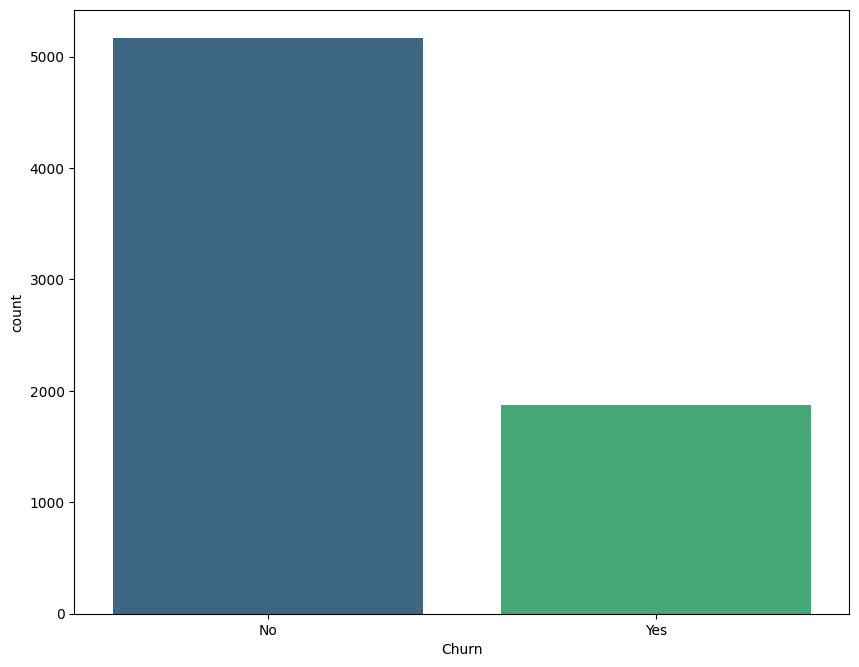

In [22]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Churn',palette='viridis')

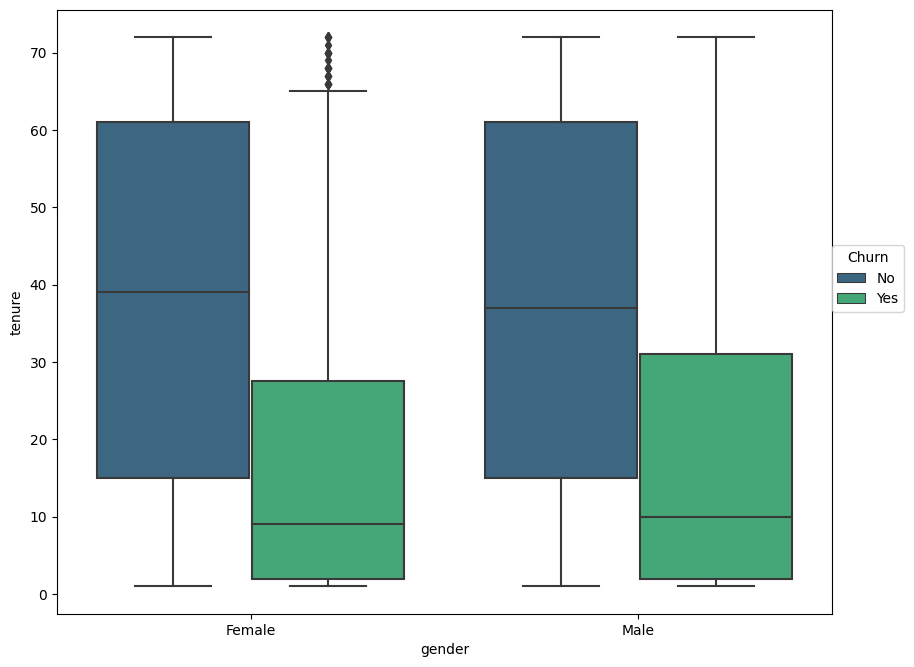

In [23]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

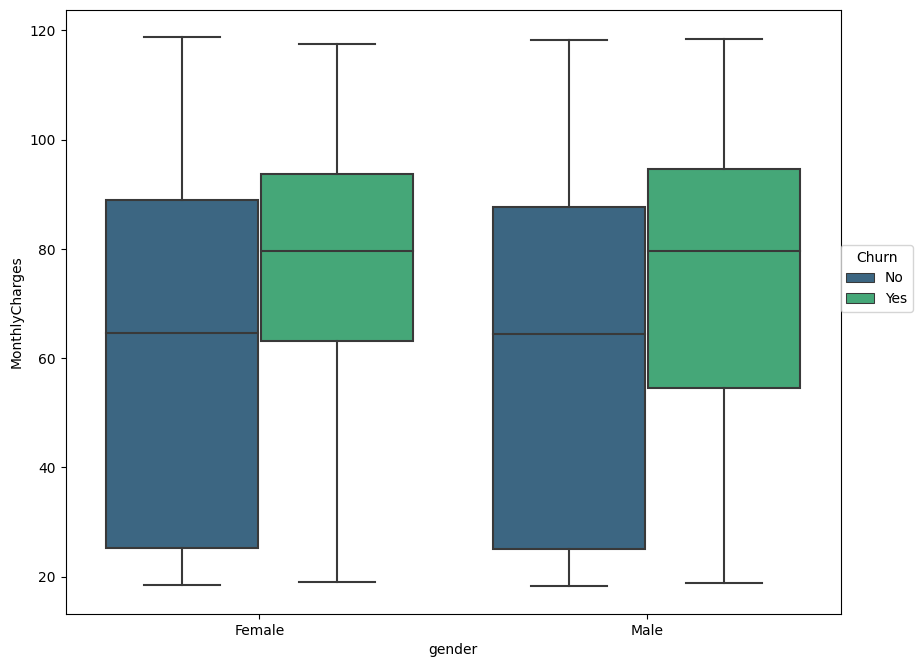

In [24]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender', y= 'MonthlyCharges',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

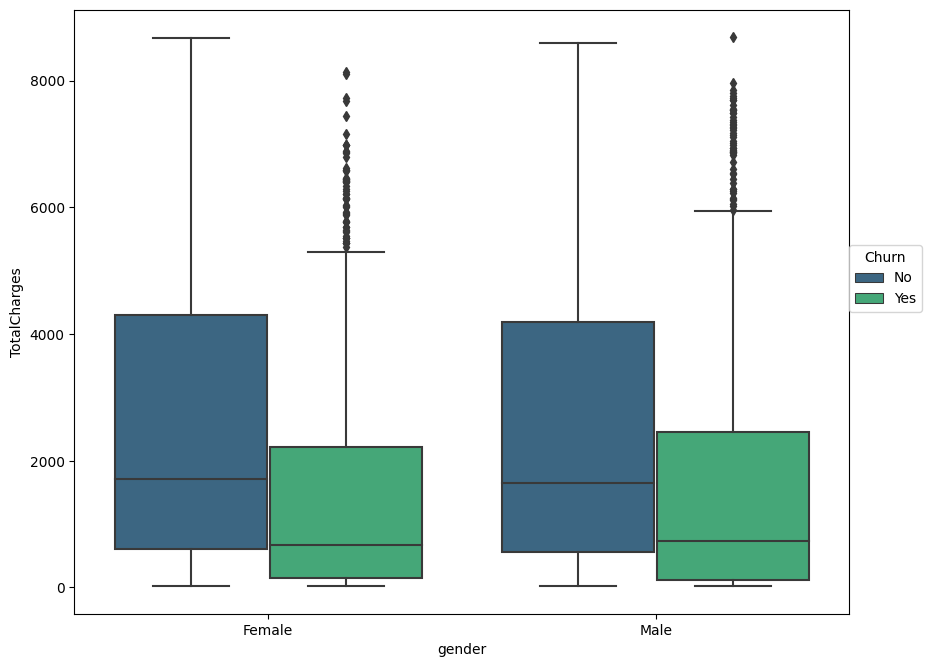

In [25]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender',y='TotalCharges',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

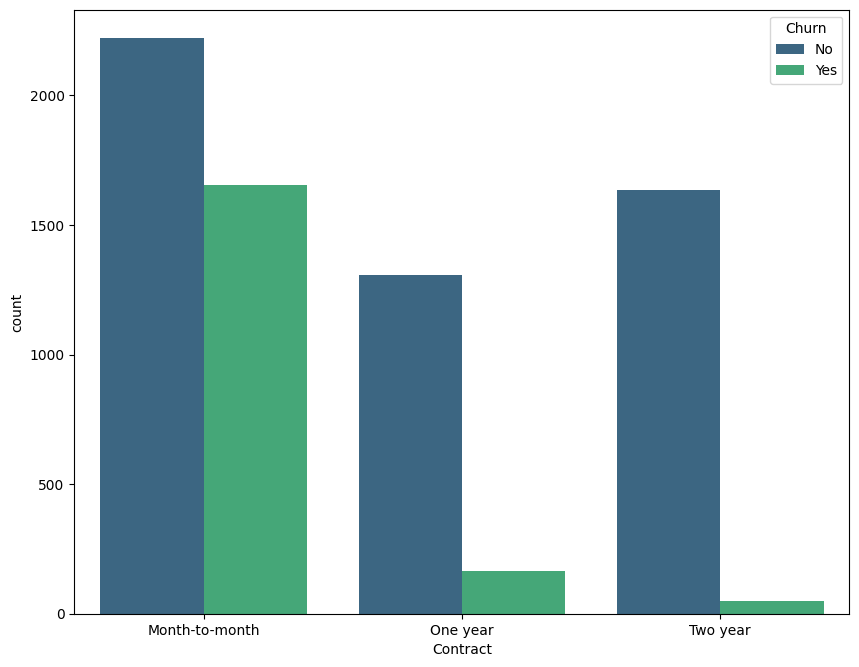

In [26]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Contract',hue='Churn',palette='viridis')

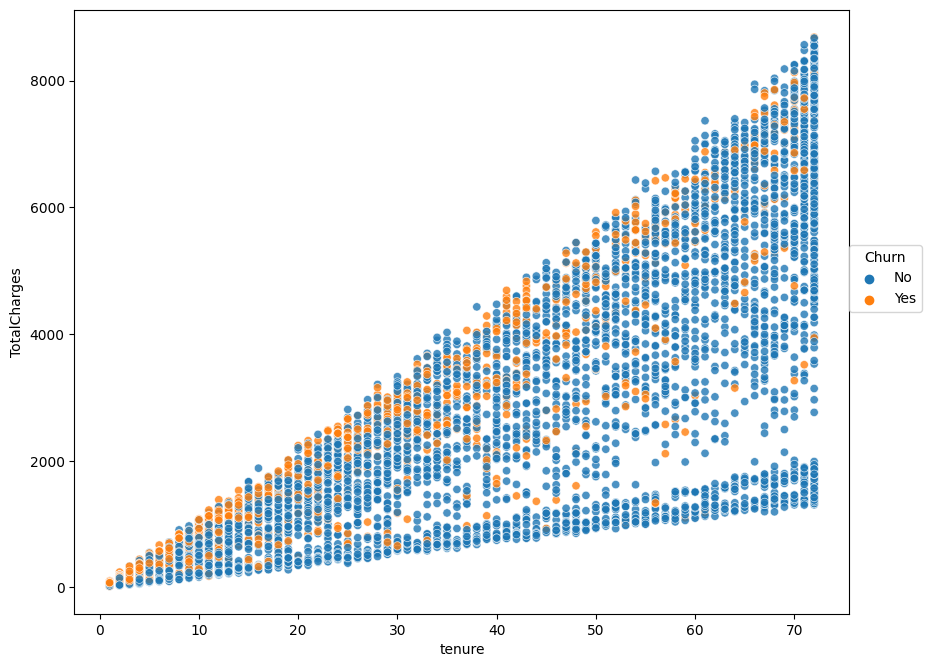

In [27]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")

In [28]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

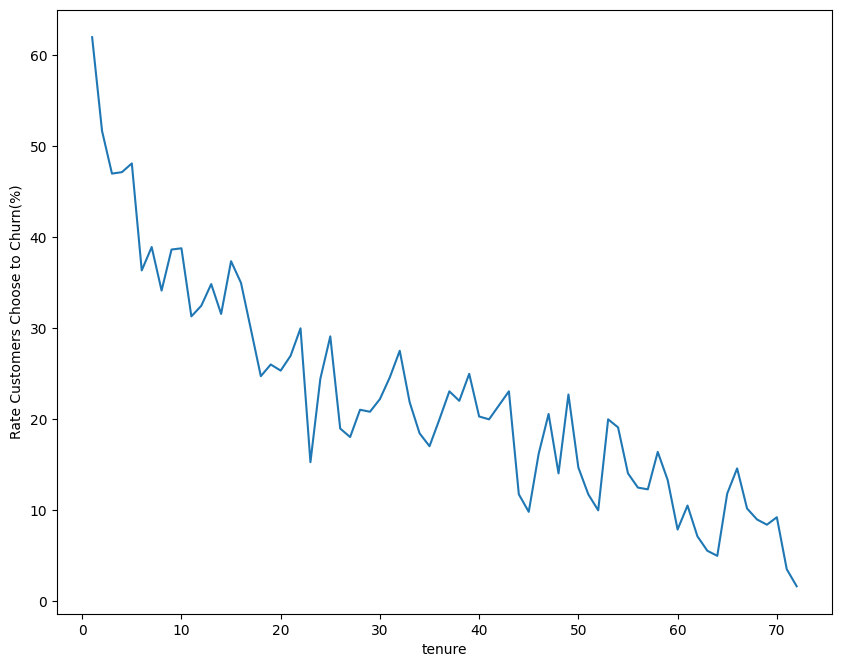

In [29]:
churn_rates_Yes = 100 * yes_churn/(no_churn+yes_churn)
plt.figure(figsize=(10,8),dpi=100)
plt.ylabel('Rate Customers Choose to Churn(%)')
churn_rates_Yes.iloc[0].plot()

In [30]:
df_corr  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [31]:
df_corr.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
gender_Female,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
SeniorCitizen_No,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,...,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987,0.150541,-0.150541
SeniorCitizen_Yes,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
Partner_No,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982


In [32]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_No                          -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

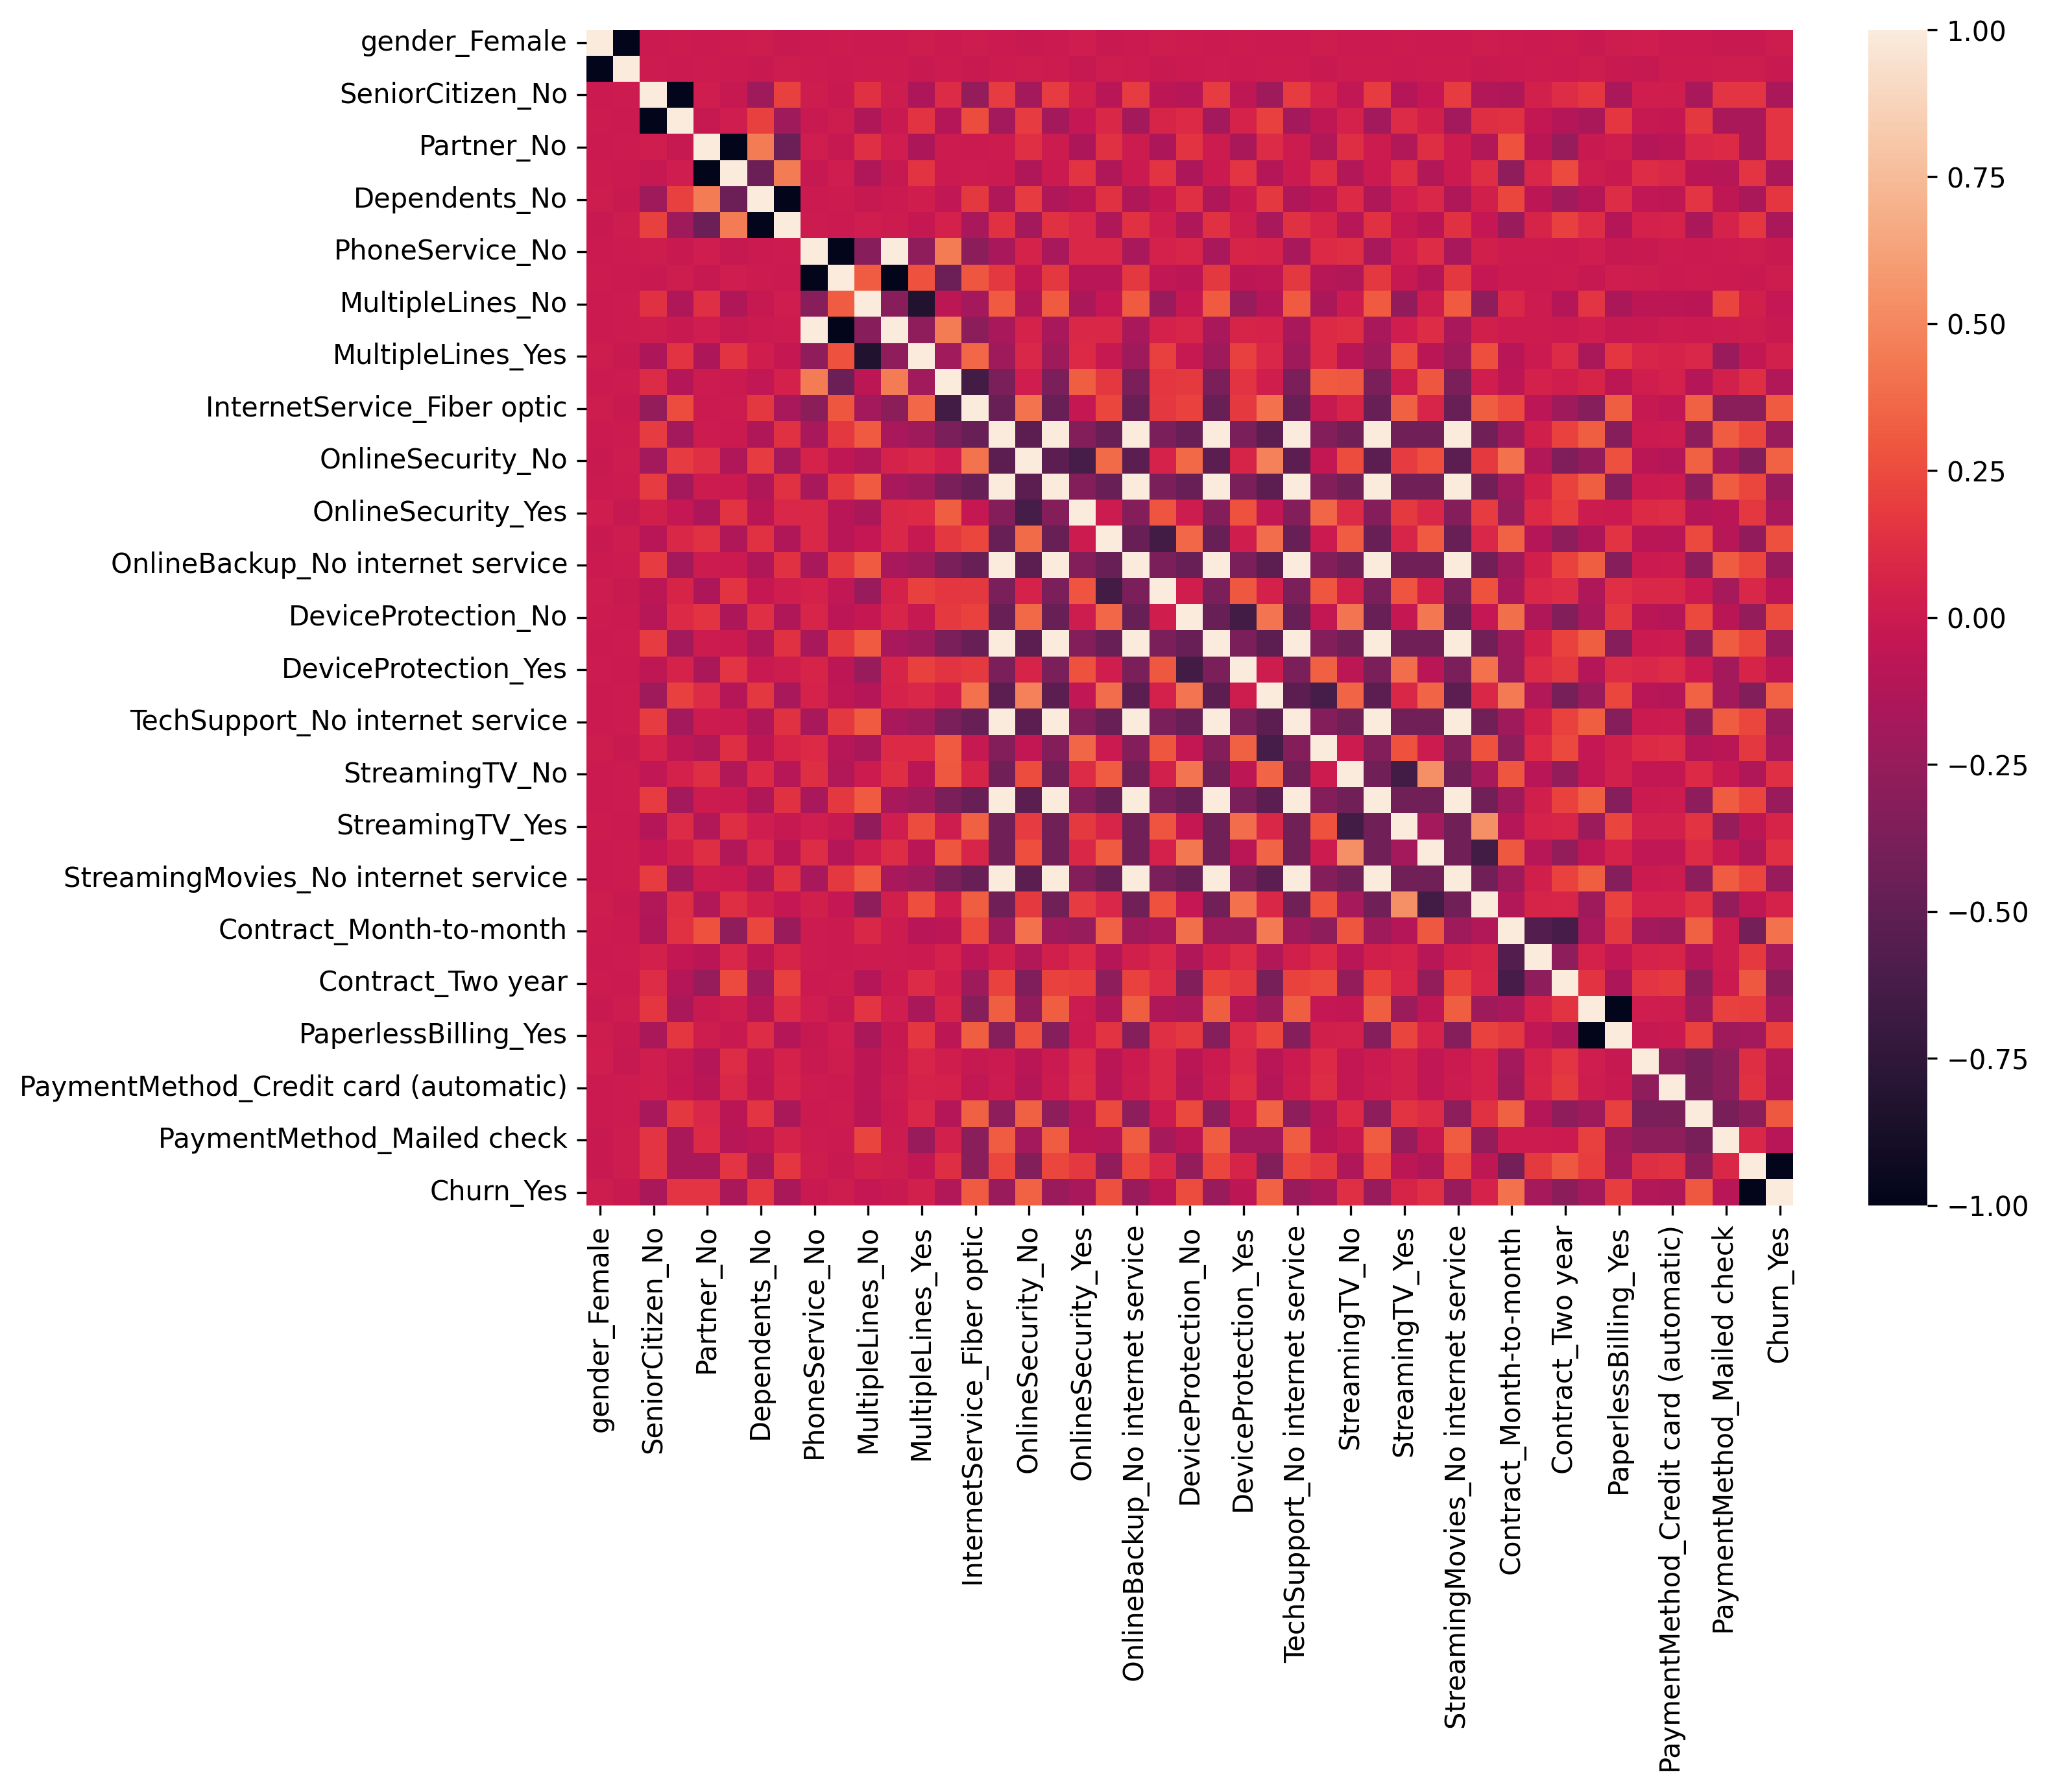

In [33]:
plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(df_corr)

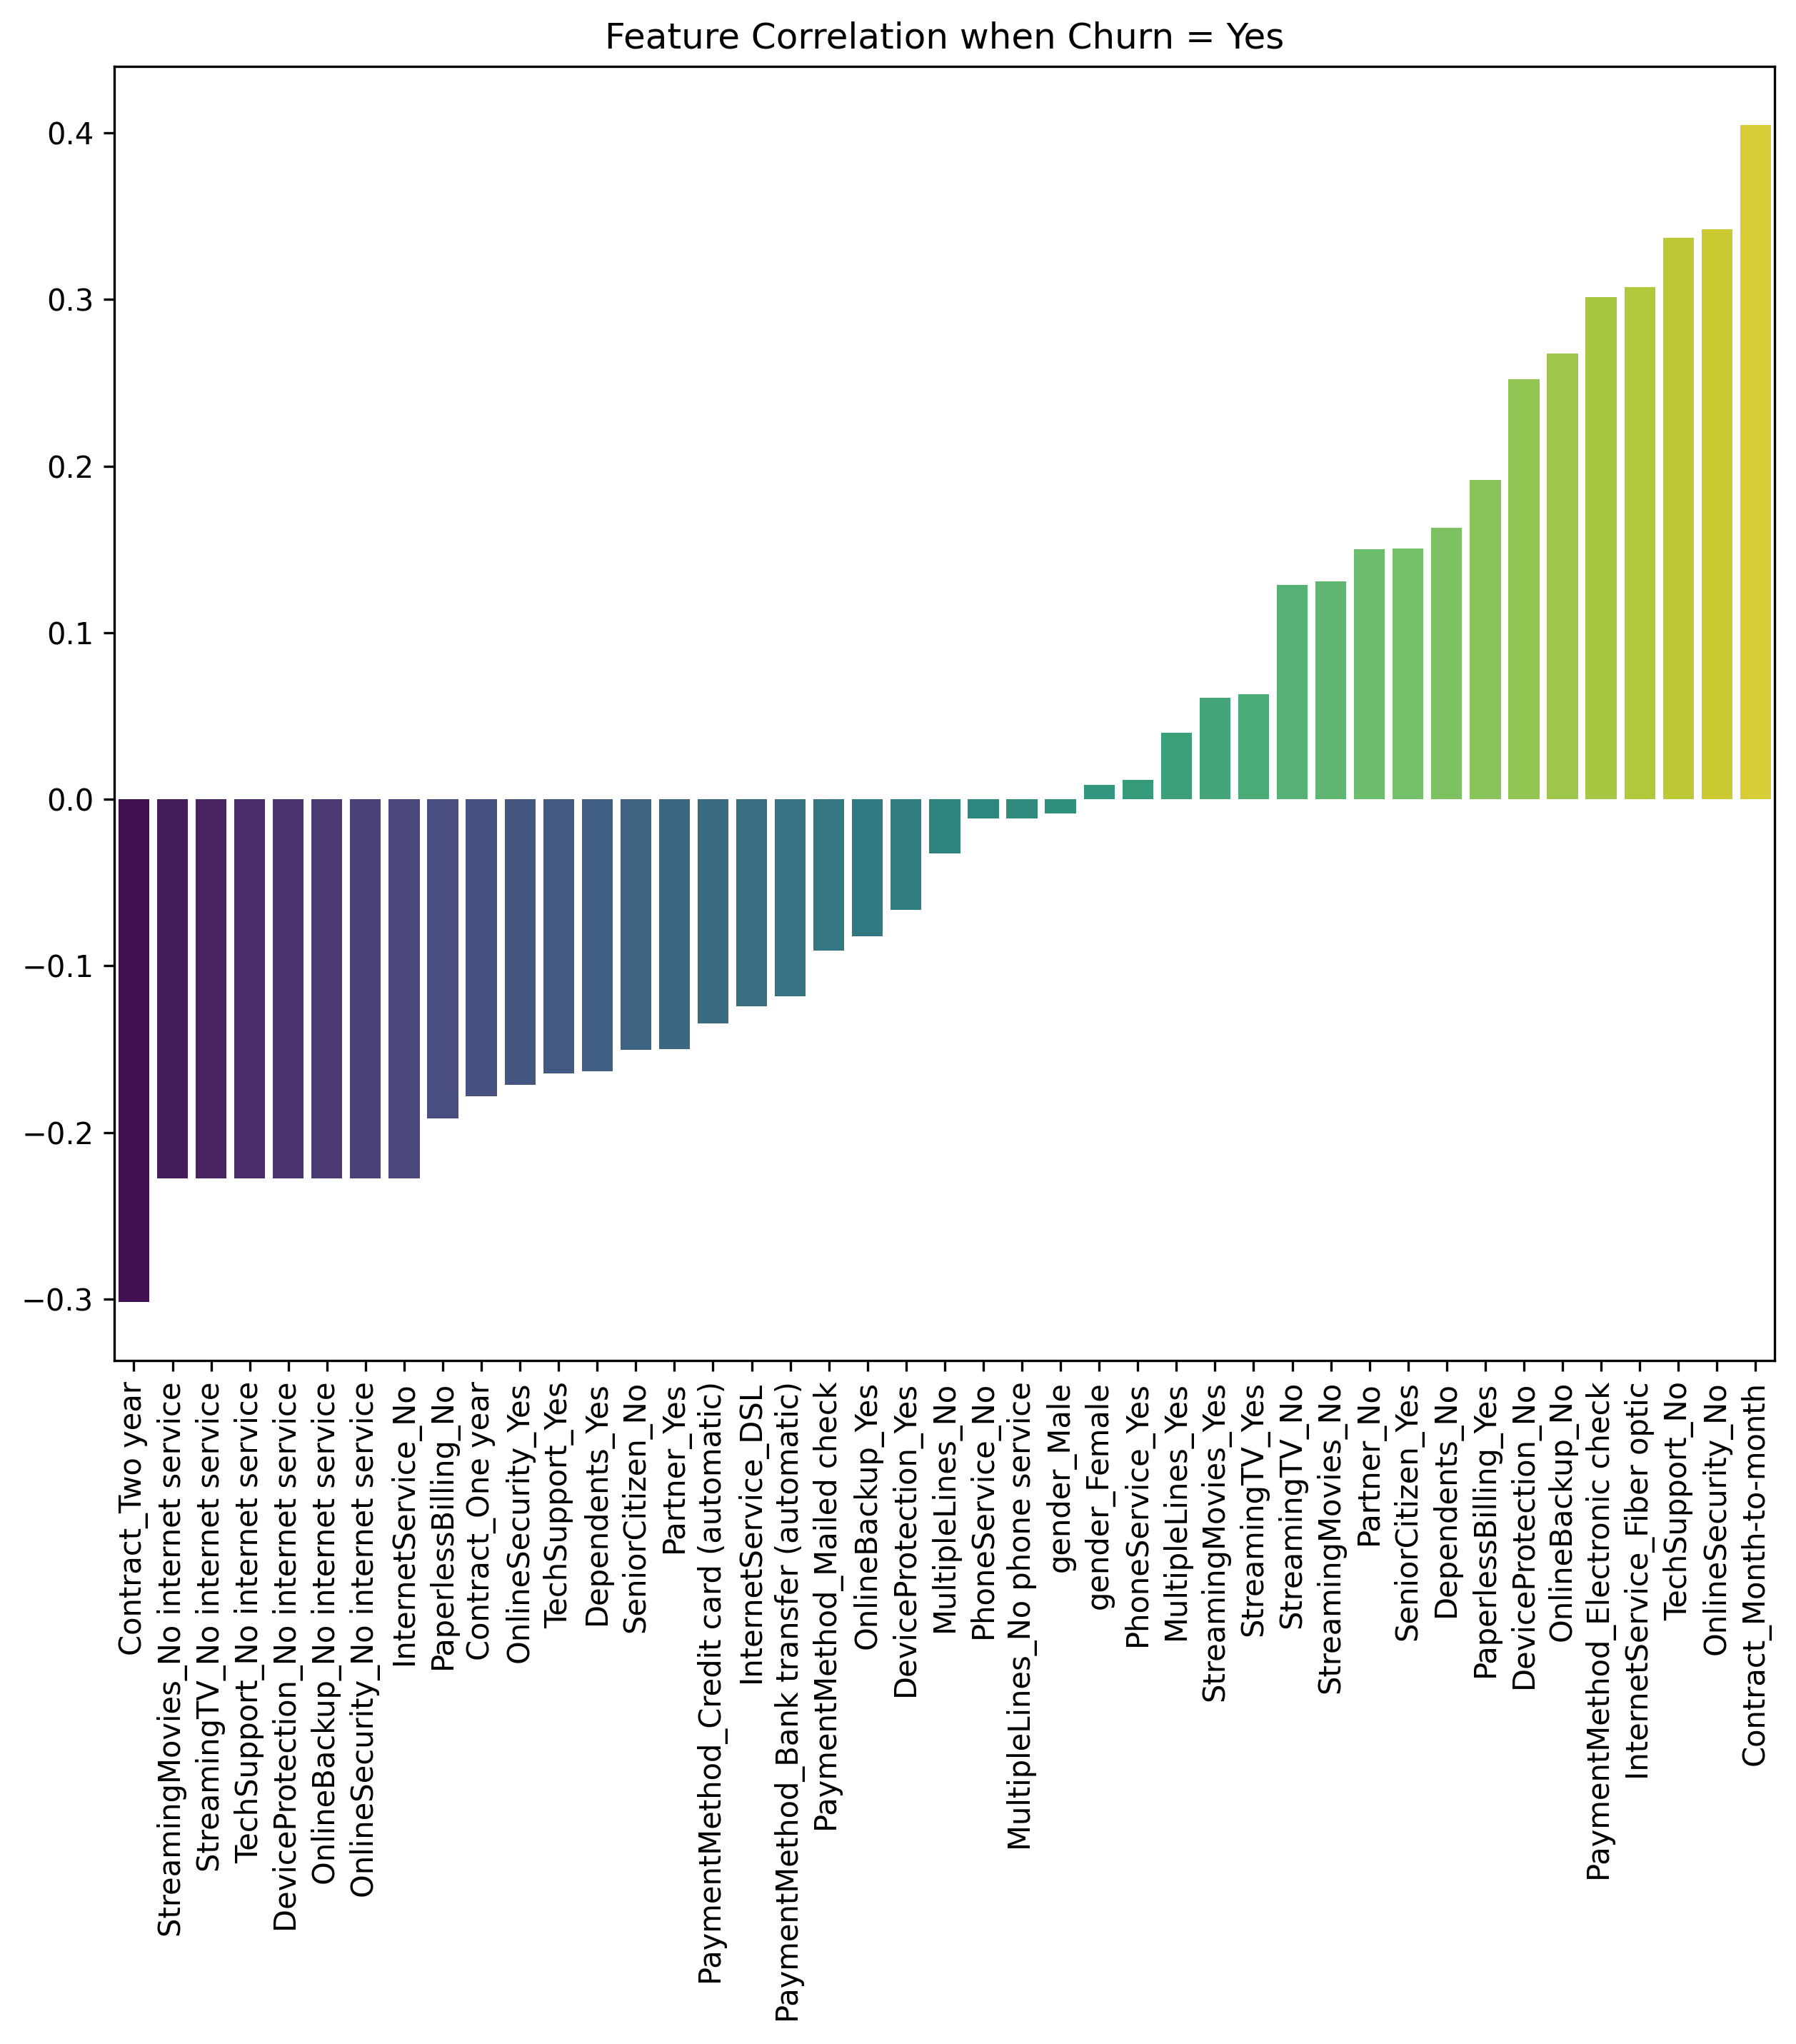

In [34]:
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = Yes')
plt.xticks(rotation=90);

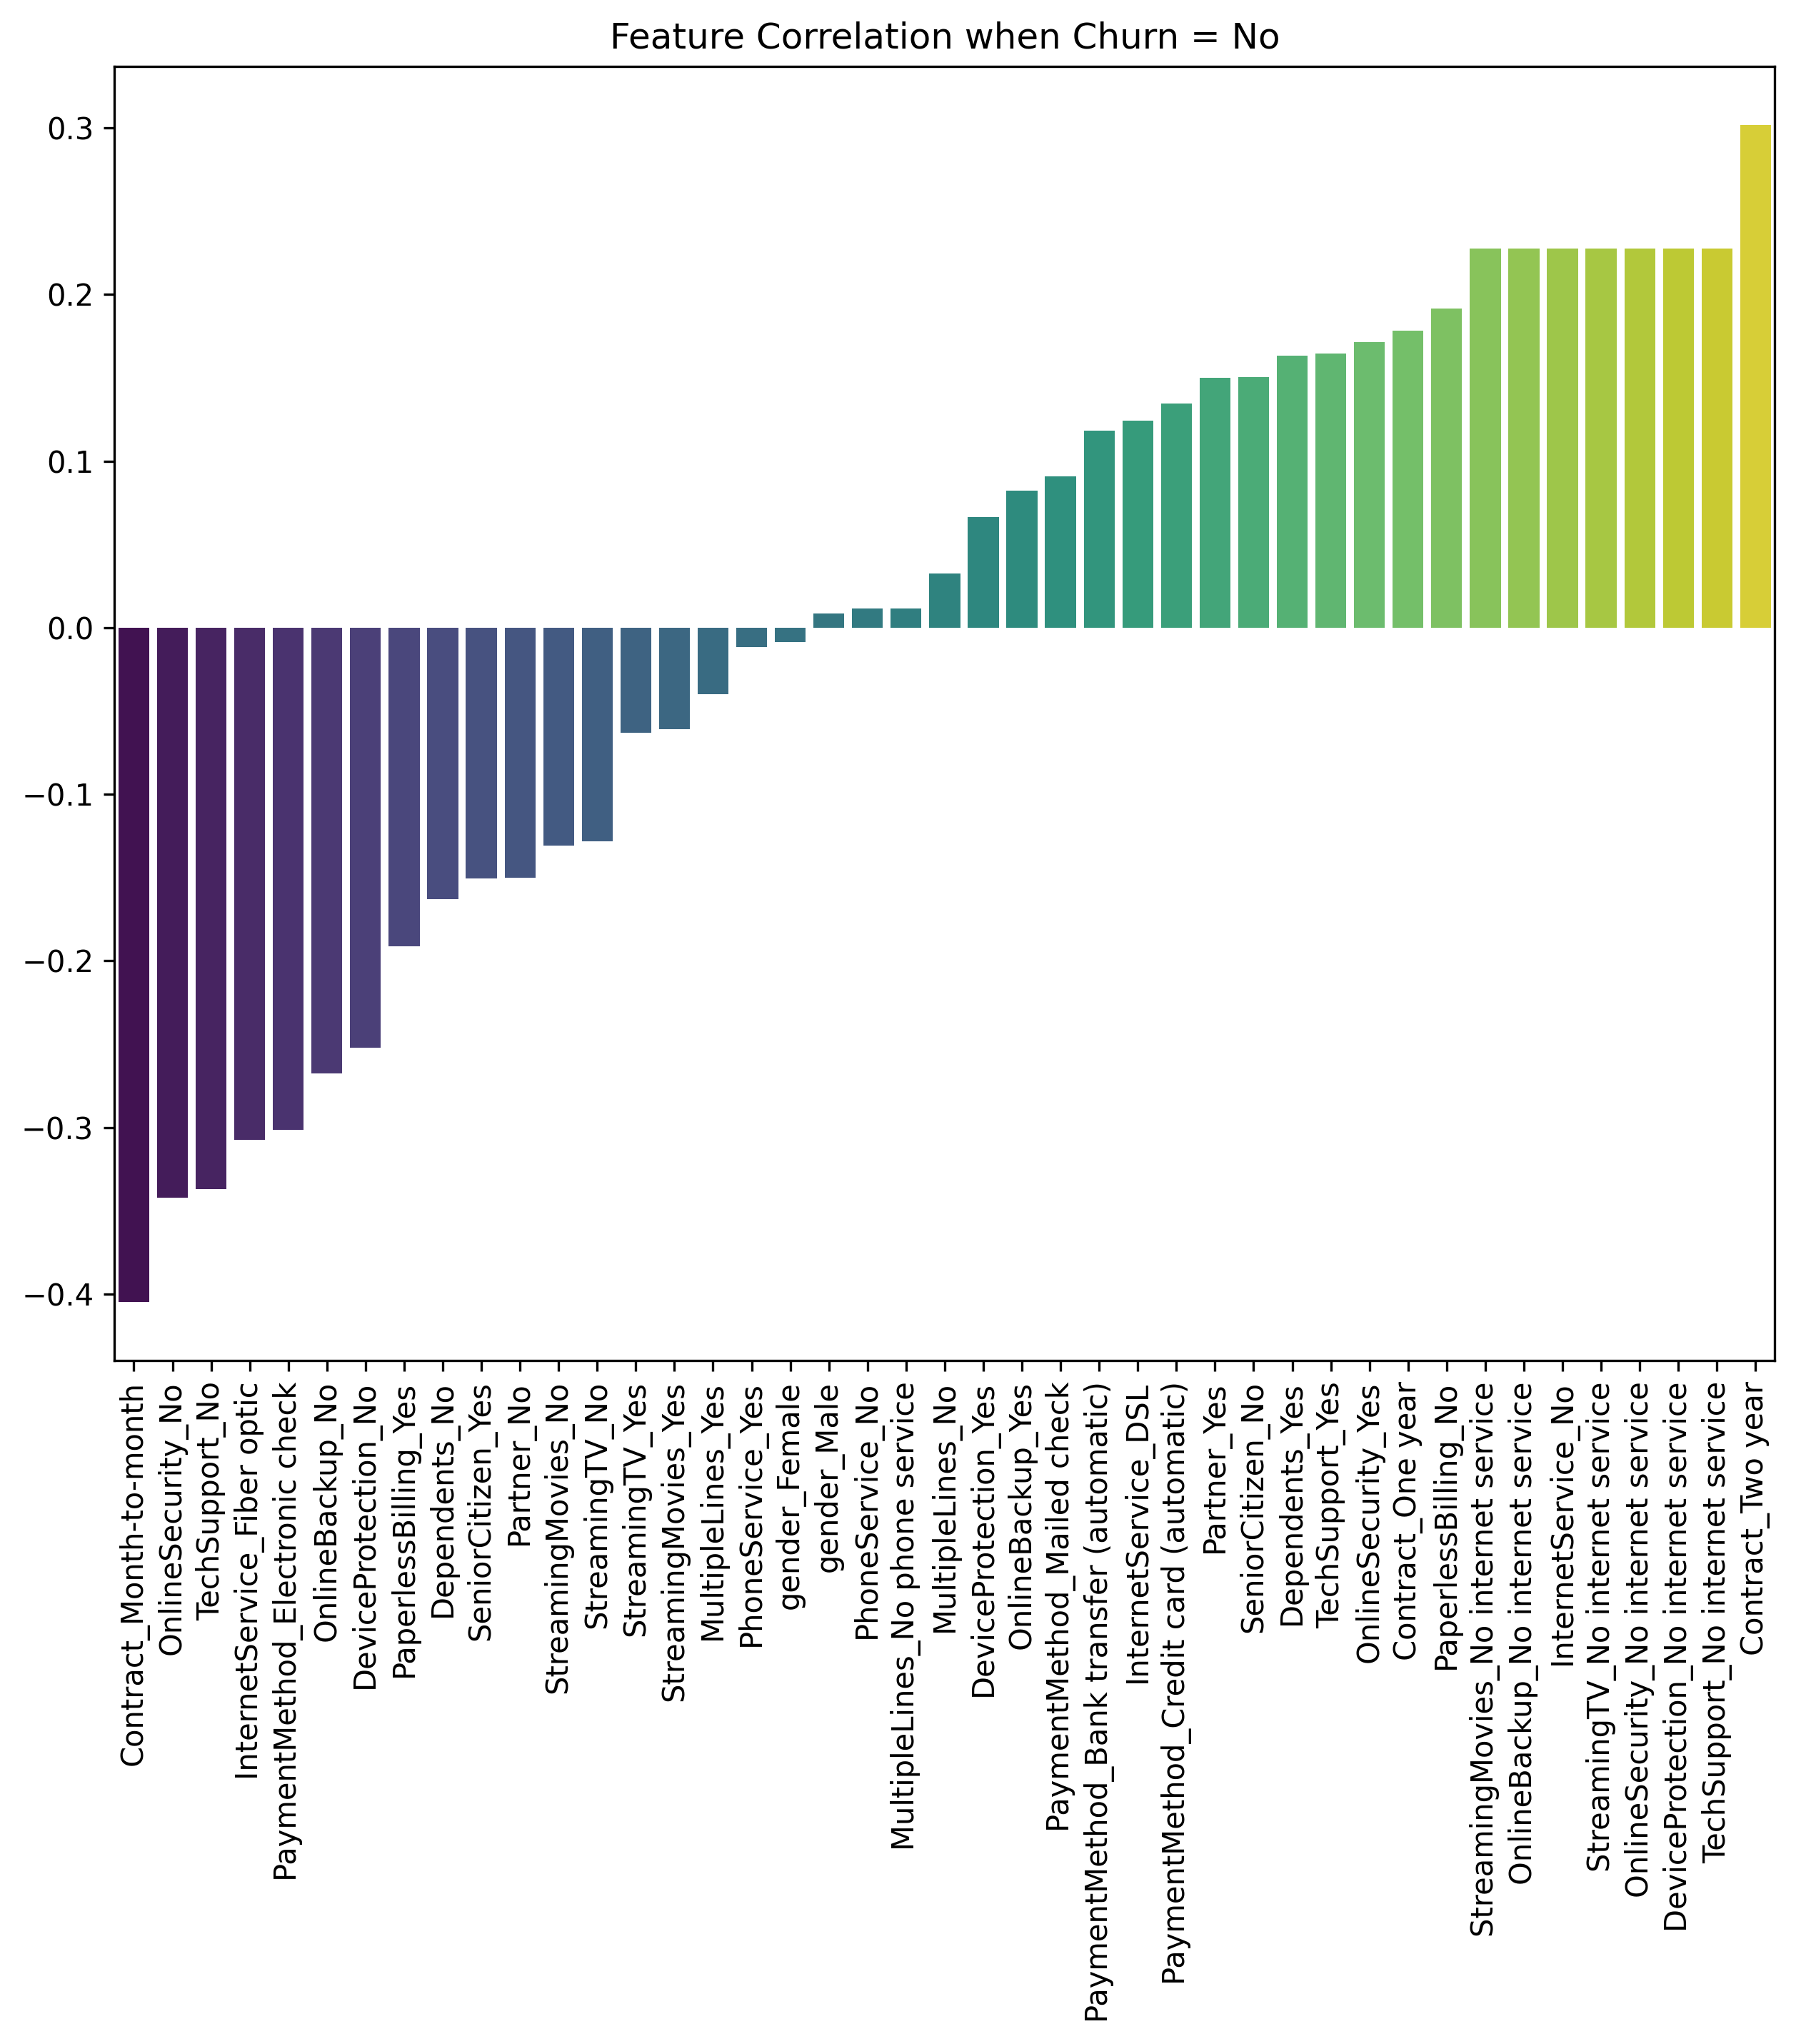

In [35]:
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(x=df_corr['Churn_No'].sort_values().iloc[1:-1].index,y=df_corr['Churn_No'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = No')
plt.xticks(rotation=90);

In [36]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [37]:
def totalCharges_seperated (total_charges):
    if total_charges <= 3000:
        return 'Total Charges Beetween 0 and 3000'
    elif total_charges > 3000 and total_charges <=6000:
        return 'Total Charges Beetween 3000 and 6000'
    else:
        return 'Total Charges greater than 6000'

In [38]:
df['seperated_total_charges'] = df['TotalCharges'].apply(totalCharges_seperated)

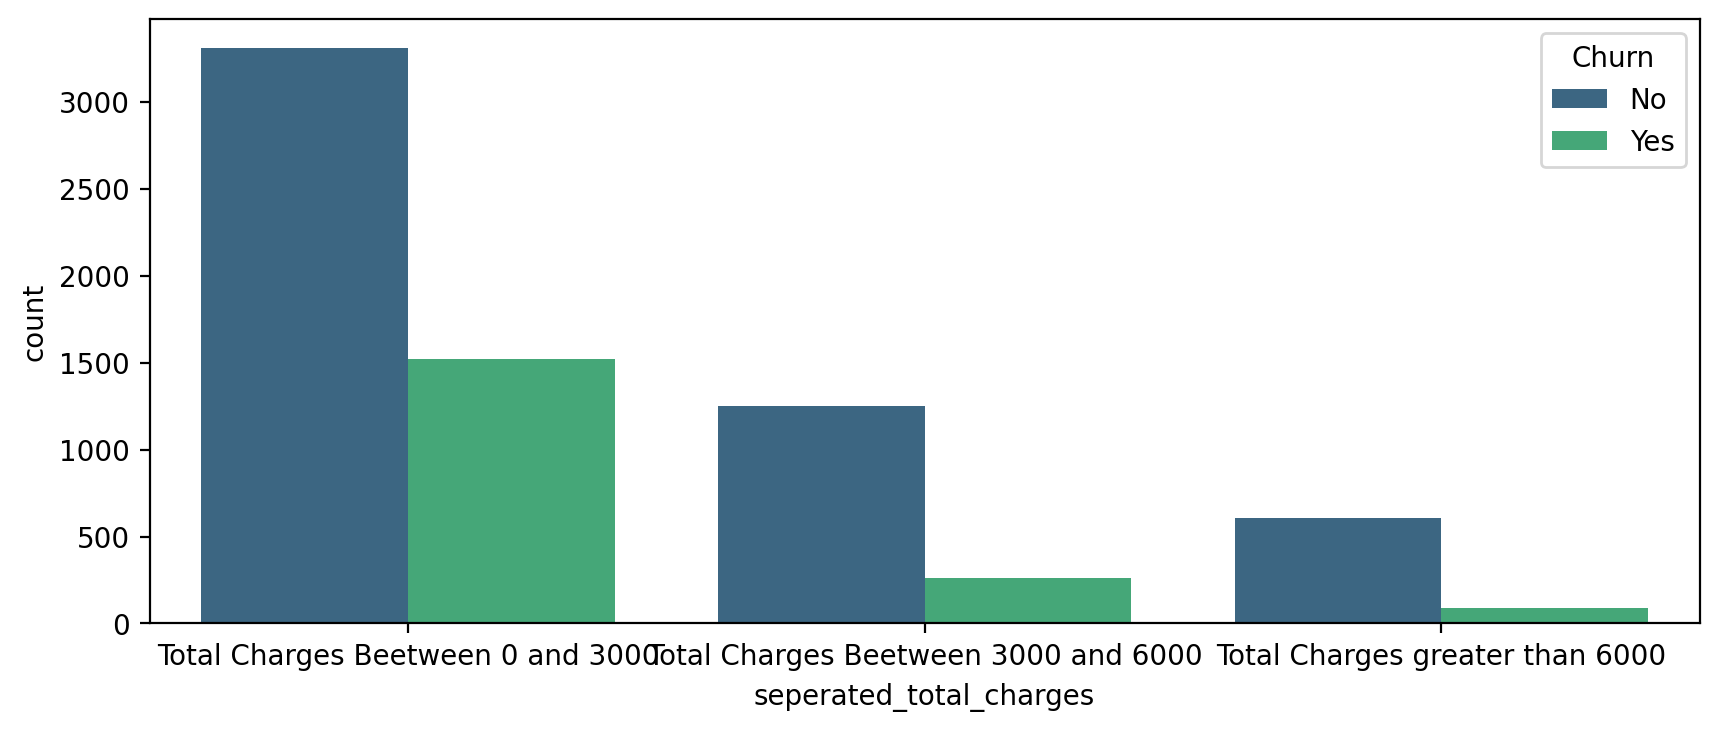

In [39]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='seperated_total_charges',hue='Churn',palette='viridis')

In [40]:
def yearly_tenure(tenure):
    if tenure <= 12:
        return 1
    elif tenure >12 and tenure <=24:
        return 2
    elif tenure >24 and tenure <=36:
        return 3
    elif tenure >36 and tenure <=48:
        return 4
    elif tenure >48 and tenure <=60:
        return 5
    elif tenure > 60 and tenure <=72:
        return 6

In [41]:
df['yearly_tenure'] = df['tenure'].apply(yearly_tenure)

Text(0.5, 0, 'Tenure in years')

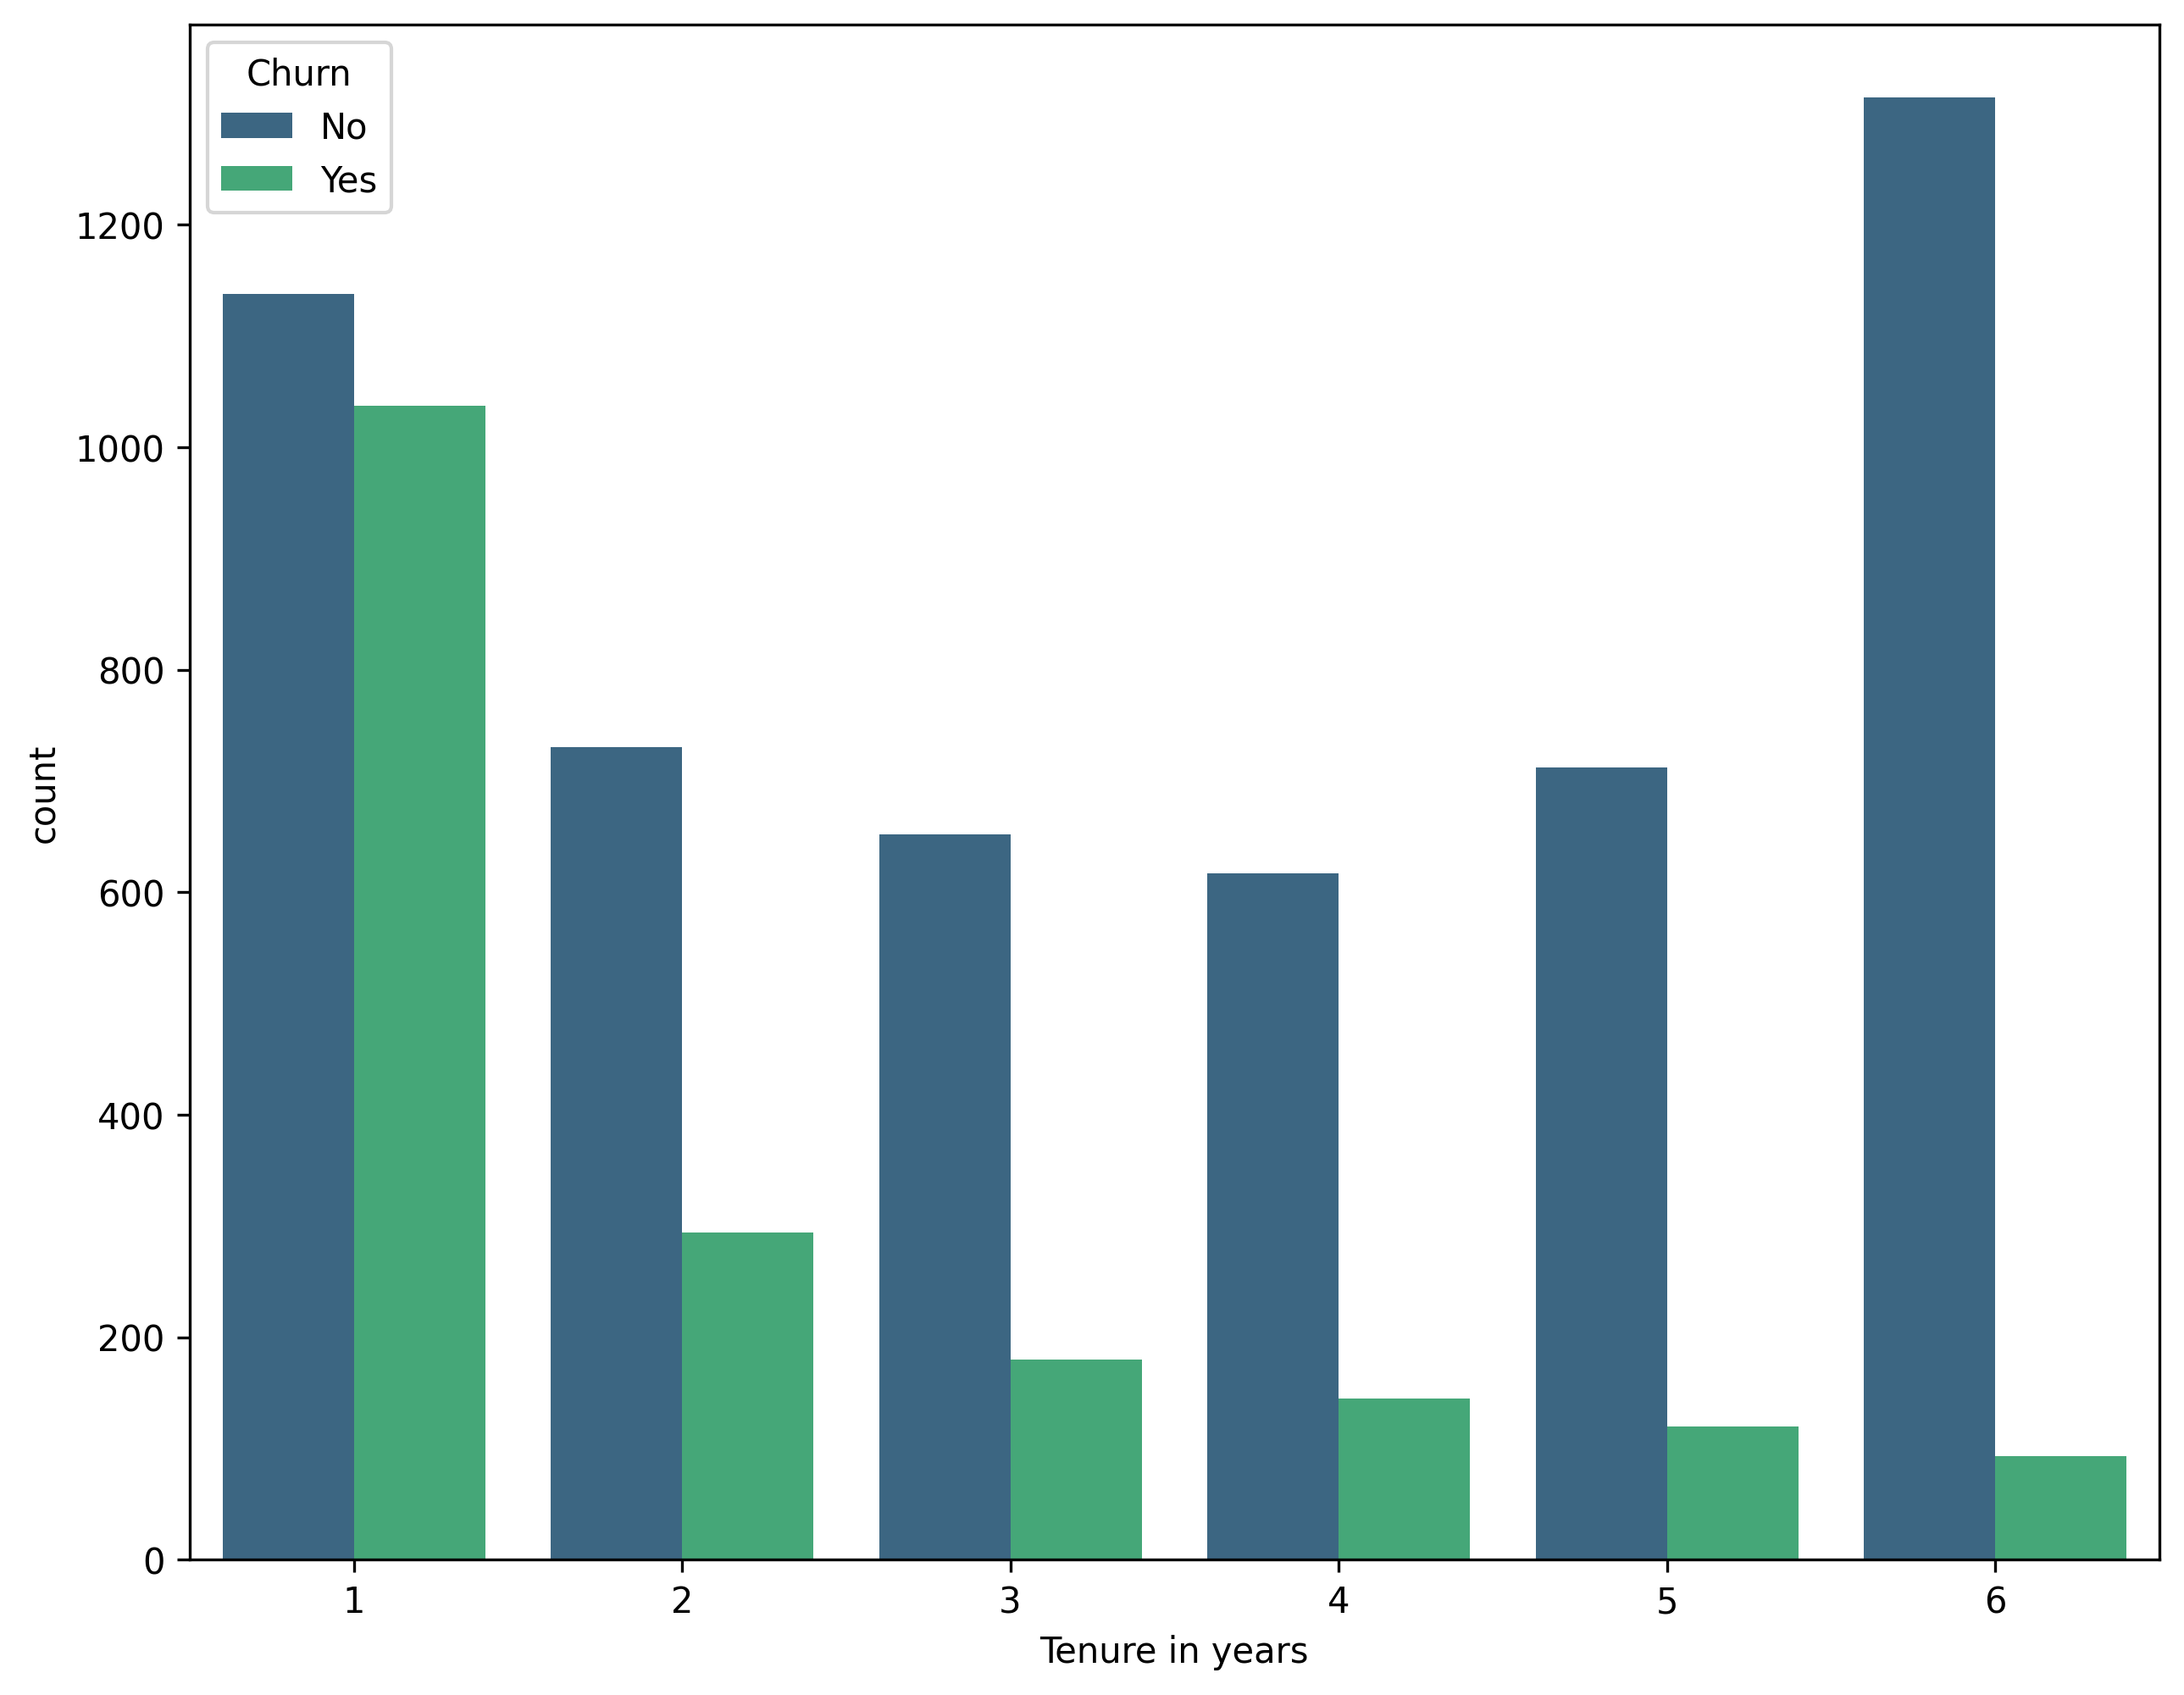

In [42]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='yearly_tenure',hue='Churn',palette='viridis')
plt.xlabel('Tenure in years')

In [43]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [44]:
 def Monthly_plans(monthly_charge):
    if monthly_charge <= 30:
        return 'Basic Plan'
    elif monthly_charge >30 and monthly_charge <= 60:
        return 'Advanced Plan'
    elif monthly_charge >60 and monthly_charge <= 100:
        return 'Premium Plan'
    elif monthly_charge >100:
        return 'Executive Plan'

In [45]:
df['PlanType'] = df['MonthlyCharges'].apply(Monthly_plans)

Text(0.5, 0, 'Type of Plan')

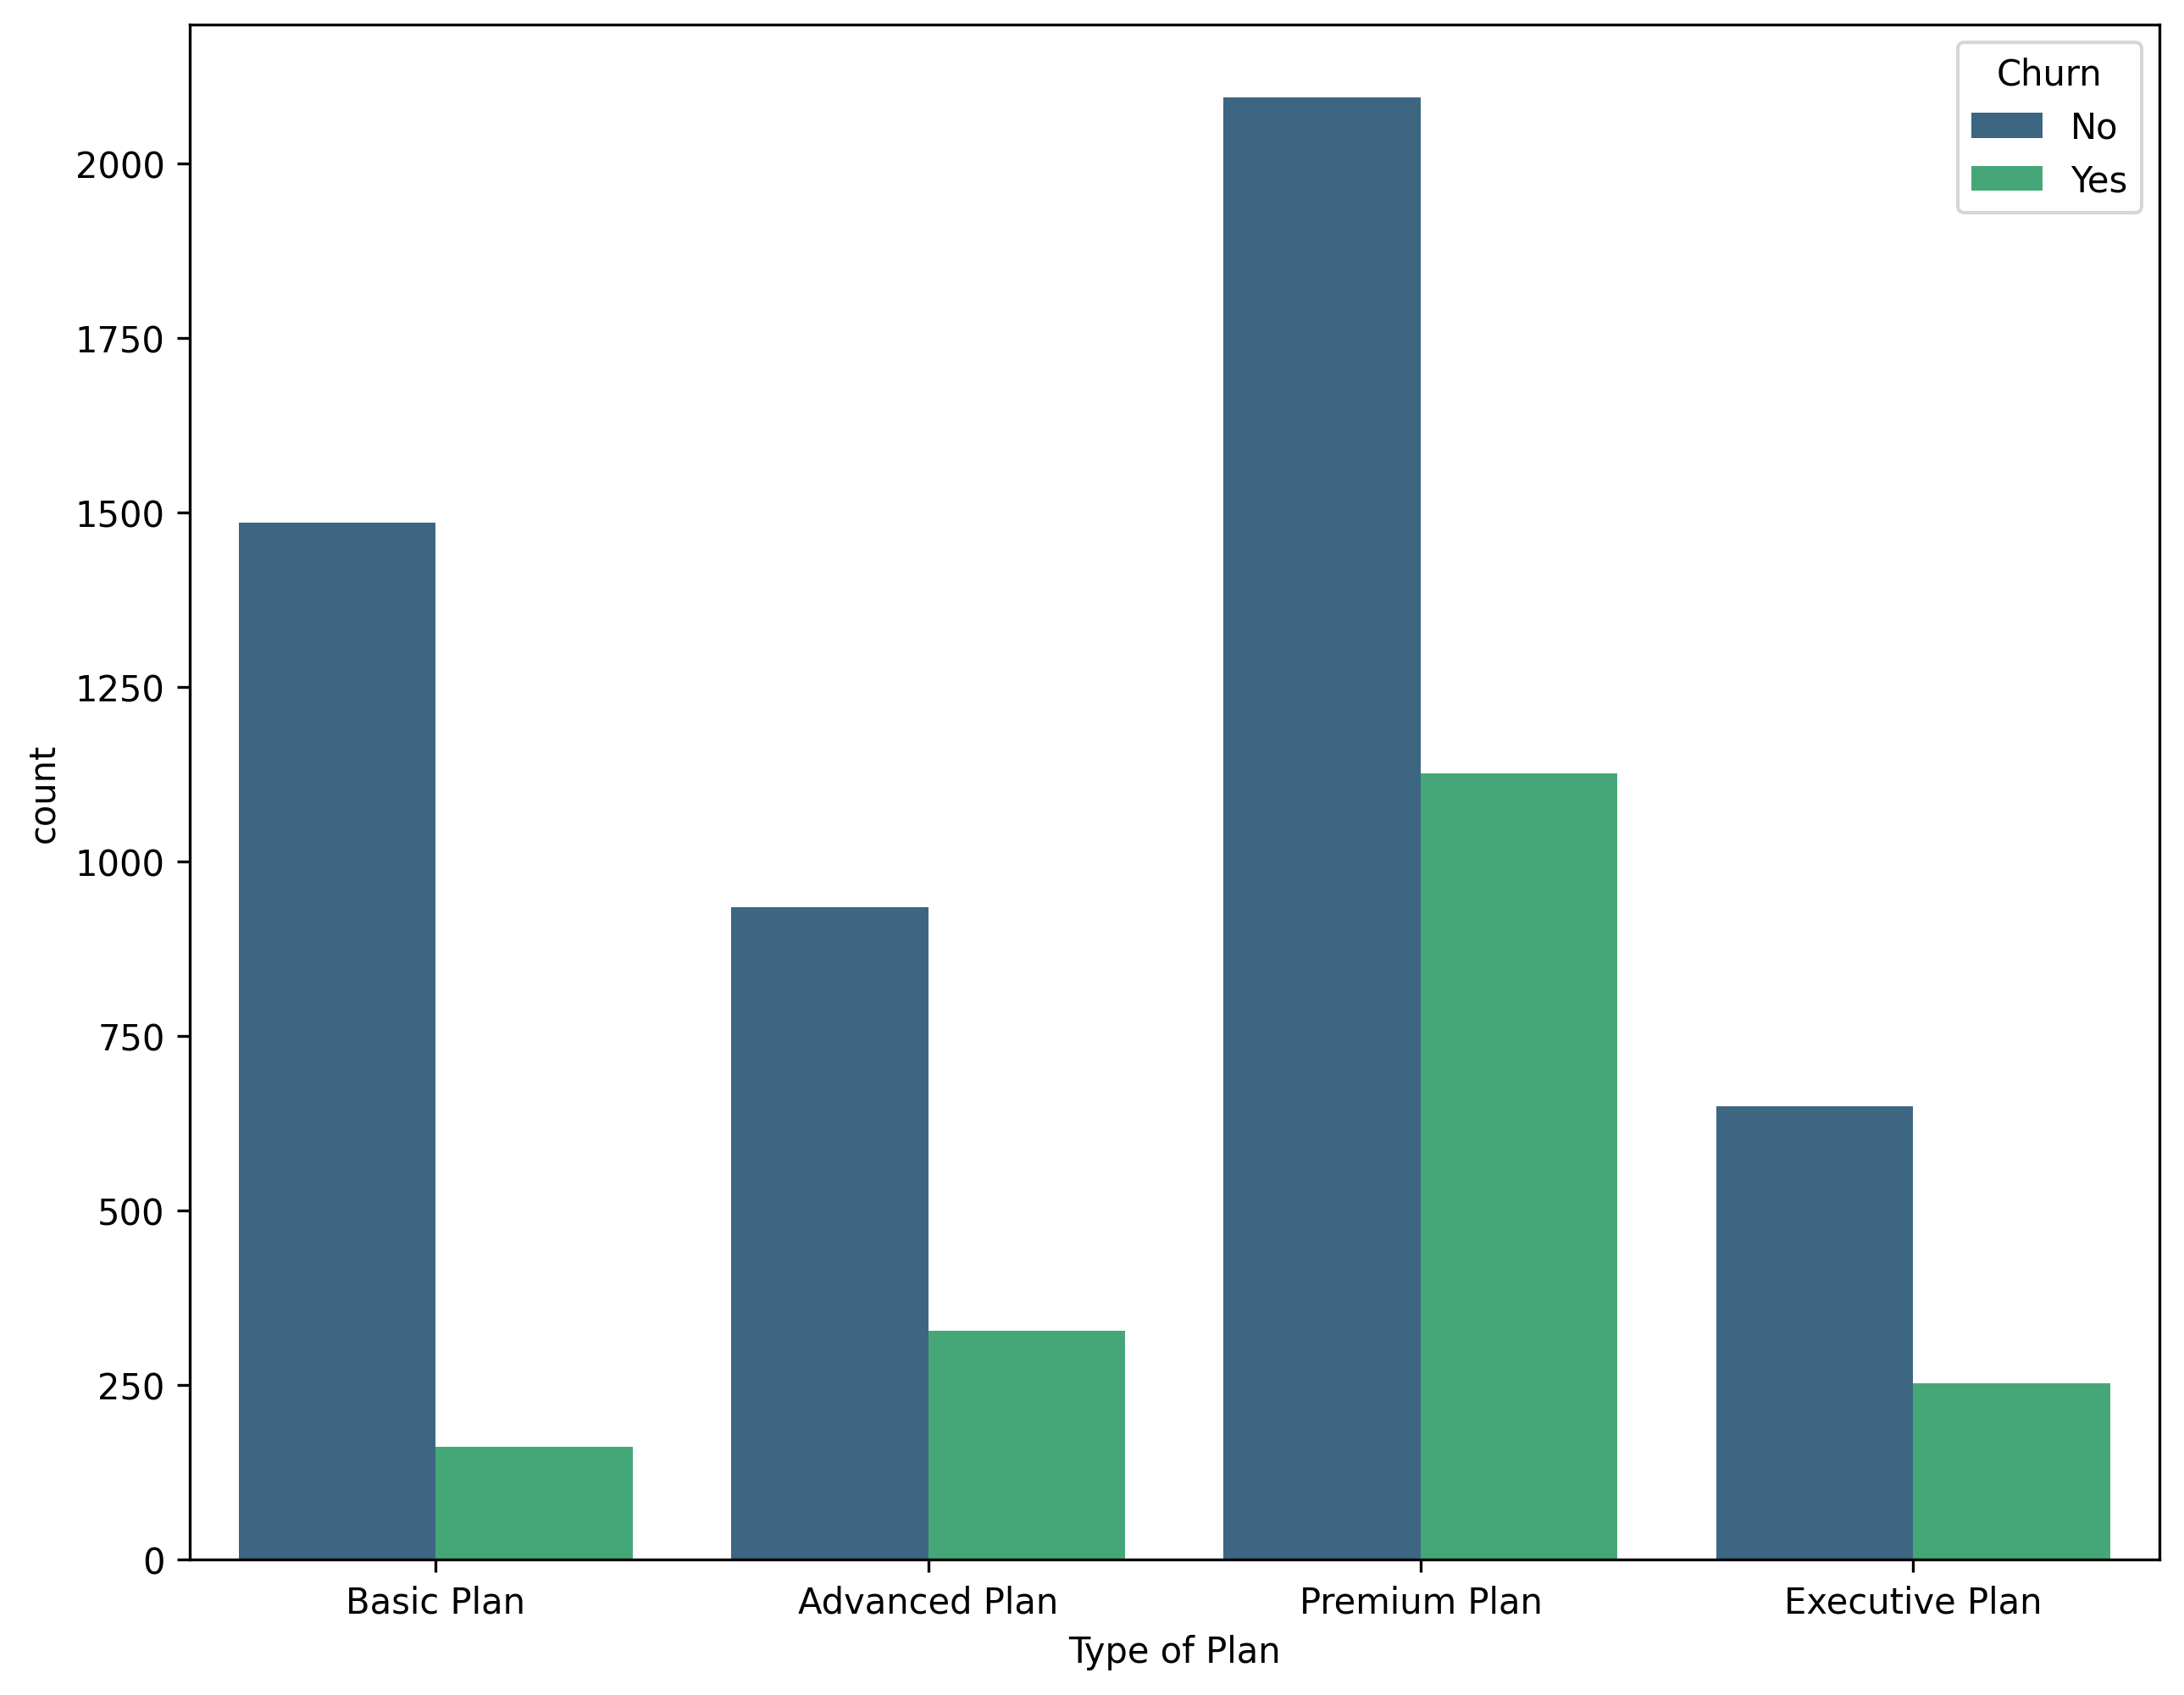

In [46]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='PlanType',hue='Churn',palette='viridis')
plt.xlabel('Type of Plan')

Training/Testing Splits

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X= pd.get_dummies(df.drop(['Churn','customerID'],axis=1),drop_first=True)
y= df['Churn']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Scale Data

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler= StandardScaler()

In [52]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

KNN

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [54]:
param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid)
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [55]:
knn_predictions = knn_grid_model.predict(scaled_X_test)

In [56]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [57]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1300
         Yes       0.59      0.56      0.57       458

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


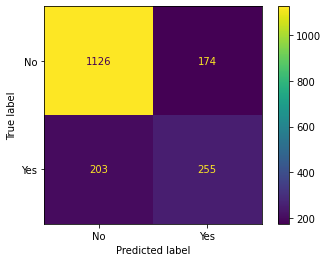

In [58]:
plot_confusion_matrix(knn_grid_model,scaled_X_test,y_test)

SVM

In [59]:
from sklearn.svm import SVC

In [60]:
svc = SVC()
param_grid_svm={'C': [0.1,0.5,1,2,10],'gamma':['scale','auto'],'kernel': ['linear','rbf','poly','sigmoid']}

In [61]:
svc_grid_model= GridSearchCV(svc,param_grid_svm,cv=5)

In [62]:
svc_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [63]:
svc_predictions = svc_grid_model.predict(scaled_X_test)

In [64]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1300
         Yes       0.64      0.46      0.53       458

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


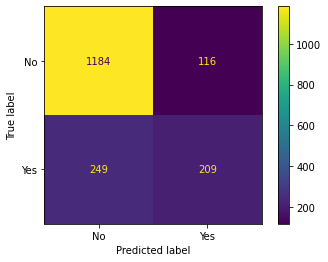

In [65]:
plot_confusion_matrix(svc_grid_model,scaled_X_test,y_test)

Gradient Boost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbmodel= GradientBoostingClassifier()
gb_param_grid= {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [68]:
grid_gb= GridSearchCV(gbmodel,gb_param_grid,cv=5)

In [69]:
grid_gb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [70]:
gb_predictions = grid_gb.predict(X_test)

In [71]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1300
         Yes       0.63      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


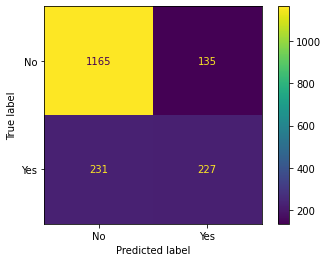

In [72]:
plot_confusion_matrix(grid_gb,X_test,y_test)

Adaptive Boost

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
Ada_model= AdaBoostClassifier()
param_grid_Ada= {'n_estimators':range(1,50)}

In [75]:
error_rates= []
for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    
    predict= model.predict(X_test)
    
    error= 1- accuracy_score(y_test,predict)
    
    error_rates.append(error)

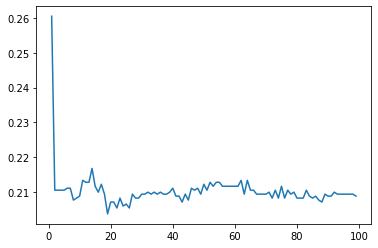

In [76]:
plt.plot(range(1,100),error_rates)

In [77]:
Ada_model_final = AdaBoostClassifier(n_estimators=20)
Ada_model_final.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [78]:
Ada_prediction= Ada_model_final.predict(X_test)

In [79]:
print(classification_report(y_test,Ada_prediction))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.62      0.53      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


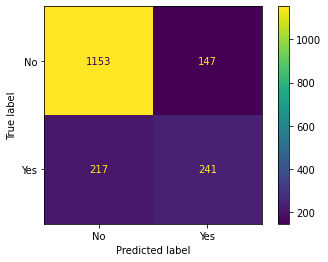

In [80]:
plot_confusion_matrix(Ada_model_final,X_test,y_test)

Feature Importance Plot for AdaBoost Model

In [81]:
Ada_model_final.feature_importances_

array([0.2 , 0.  , 0.1 , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.05, 0.05,
       0.1 , 0.  , 0.  , 0.05, 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.  , 0.05, 0.05, 0.05, 0.05, 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.05])

In [82]:
features= pd.DataFrame(index= X.columns,data=model.feature_importances_,columns=['Importance'])

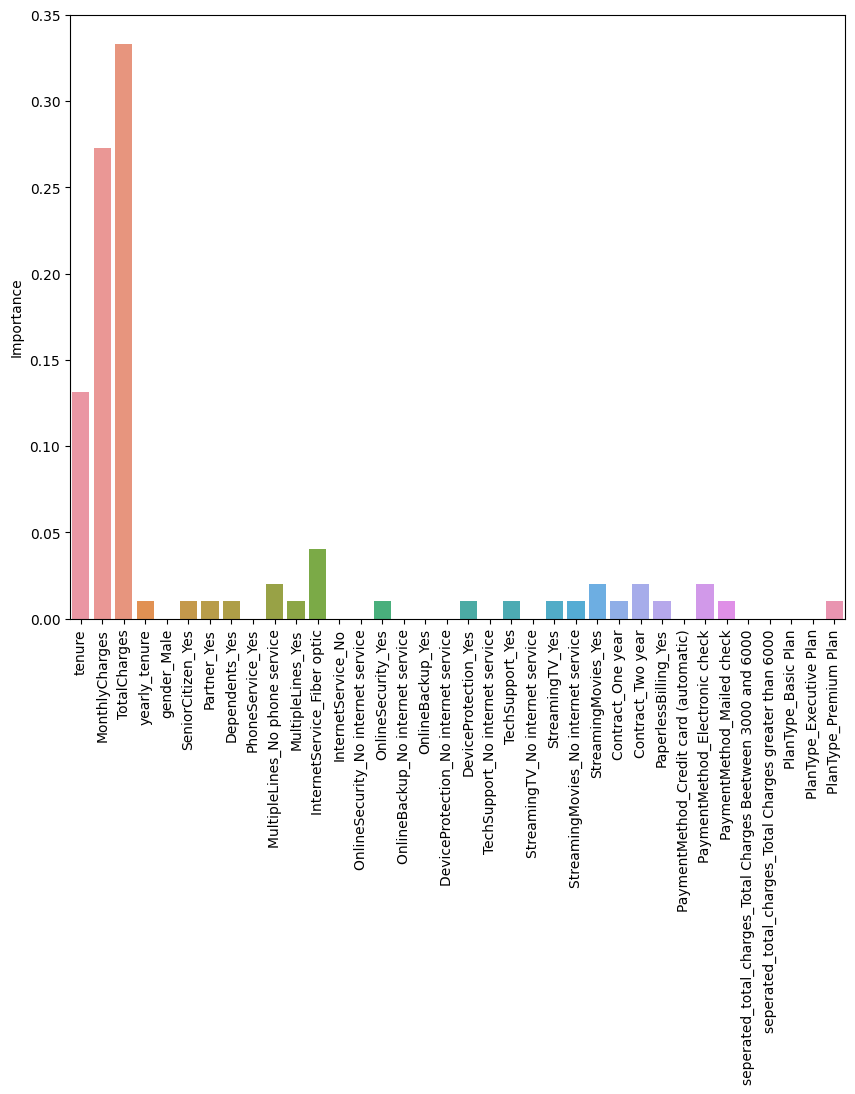

In [83]:
plt.figure(figsize=(10,8),dpi=100)
plt.xticks(rotation=90)
sns.barplot(data=features,x=features.index,y='Importance')